In this little example we will look at several ways to predict the quality of wine based on several measurable quanities. But remember, waine tasting is largely a matter of personal taste.

Frist, let's invoke some of the imports we will need.

In [2]:
import tensorflow as tf
import numpy as np
import os
import urllib
import random
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import tarfile

 

Next we need to make sure we have the data sets we needed downloaded. First let's get our data sets.

In [3]:
white_wine_file = "winequality-white.csv"
if not os.path.exists(white_wine_file):
    urllib.request.urlretrieve("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", white_wine_file)

red_wine_file = "winequality-red.csv"
if not os.path.exists(red_wine_file):
    urllib.request.urlretrieve("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", red_wine_file)


Now we need to load and explore the data set. Load them into memory using the numpy tooling. The columns have the following meaings:
'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'. We will pretty much ignore these as we will be doing ML based only on non-expert traing straegies. We also separate out the labels from the features.

In [4]:

tags = np.array(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])
ww = np.loadtxt(white_wine_file, skiprows=1, delimiter=';')
ww_labels = ww[:, 11]
ww_features = ww[:, range(11)]
rw = np.loadtxt(red_wine_file, skiprows=1, delimiter=';')
rw_labels = rw[:, 11]
rw_features = rw[:, range(11)]

w_hist, _ = np.histogram(ww_labels, [0,1,2,3,4,5,6,7,8,9,10,11])
r_hist, _ = np.histogram(rw_labels, [0,1,2,3,4,5,6,7,8,9,10,11])

print("White wine features:")
print("Histogram of labels (w) = ", w_hist)
for w in range(11):
    print("Feature = %20s  (min = %6.3f, ave = %6.3f, max = %6.3f)." % (tags[w], np.min(ww_features[:,w]), np.average(ww_features[:,w]), np.max(ww_features[:,w])))

print("\nRed wine features:")
print("Histogram of labels (r) = ", r_hist)
for w in range(11):
    print("Feature = %20s  (min = %6.3f, ave = %6.3f, max = %6.3f)." % (tags[w], np.min(rw_features[:,w]), np.average(rw_features[:,w]), np.max(rw_features[:,w])))
     


White wine features:
Histogram of labels (w) =  [   0    0    0   20  163 1457 2198  880  175    5    0]
Feature =        fixed acidity  (min =  3.800, ave =  6.855, max = 14.200).
Feature =     volatile acidity  (min =  0.080, ave =  0.278, max =  1.100).
Feature =          citric acid  (min =  0.000, ave =  0.334, max =  1.660).
Feature =       residual sugar  (min =  0.600, ave =  6.391, max = 65.800).
Feature =            chlorides  (min =  0.009, ave =  0.046, max =  0.346).
Feature =  free sulfur dioxide  (min =  2.000, ave = 35.308, max = 289.000).
Feature = total sulfur dioxide  (min =  9.000, ave = 138.361, max = 440.000).
Feature =              density  (min =  0.987, ave =  0.994, max =  1.039).
Feature =                   pH  (min =  2.720, ave =  3.188, max =  3.820).
Feature =            sulphates  (min =  0.220, ave =  0.490, max =  1.080).
Feature =              alcohol  (min =  8.000, ave = 10.514, max = 14.200).

Red wine features:
Histogram of labels (r) =  [  0   0 

Next we need to divide our data into training, validation, and test data sets. Typically we target 80, 10, 10. Just in case the existing data has some existing assumptions about the order, we will take random samples or each data set. Notice that we explicitly set the random number generator seed. This way we get the same partitioning everytime we rerun the program.

In [5]:
wn = len(ww_features)
random.seed(26)
ww_ind = random.sample(range(wn), wn)
ww_f_tr = np.array([ww_features[ww_ind[i]] for i in range(0, int(0.8*wn))])
ww_f_va = np.array([ww_features[ww_ind[i]] for i in range(int(0.8*wn)+1, int(0.9*wn))])
ww_f_te = np.array([ww_features[ww_ind[i]] for i in range(int(0.9*wn)+1, wn-1)])
ww_l_tr = np.array([ww_labels[ww_ind[i]] for i in range(0, int(0.8*wn))])
ww_l_va = np.array([ww_labels[ww_ind[i]] for i in range(int(0.8*wn)+1, int(0.9*wn))])
ww_l_te = np.array([ww_labels[ww_ind[i]] for i in range(int(0.9*wn)+1, wn-1)])


Let's start with a simple K Nearest Neighbours (KNN) style machine learning. This is a straingt forwards process requiring only a single traing step. Notice that we only list the results for the validation set. This is because we will be tuning the KNN parameters and don't want to over fit against the testing data set.

In [6]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(ww_f_tr, ww_l_tr)

# Look at 10 of our validation set:
for i in range(10):
    pred = knn.predict([ww_f_va[i]])[0]
    probs = knn.predict_proba([ww_f_va[i]])
    print ("Prediction = ", pred, "Actual = ", ww_l_va[i], " Probabilities = ", probs[0])
    
# Run the complete validation data set.
score = knn.score(ww_f_va, ww_l_va)
print("Score = ", score)


Prediction =  6.0 Actual =  6.0  Probabilities =  [ 0.          0.          0.19858734  0.80141266  0.          0.          0.        ]
Prediction =  7.0 Actual =  7.0  Probabilities =  [ 0.          0.27594317  0.          0.29075244  0.4333044   0.          0.        ]
Prediction =  5.0 Actual =  5.0  Probabilities =  [ 0.          0.          0.63948569  0.36051431  0.          0.          0.        ]
Prediction =  6.0 Actual =  6.0  Probabilities =  [ 0.  0.  0.  1.  0.  0.  0.]
Prediction =  6.0 Actual =  7.0  Probabilities =  [ 0.          0.18761848  0.17104693  0.4112507   0.          0.23008388
  0.        ]
Prediction =  6.0 Actual =  6.0  Probabilities =  [ 0.  0.  0.  1.  0.  0.  0.]
Prediction =  7.0 Actual =  7.0  Probabilities =  [ 0.          0.          0.          0.          0.54366716  0.45633284
  0.        ]
Prediction =  6.0 Actual =  6.0  Probabilities =  [ 0.  0.  0.  1.  0.  0.  0.]
Prediction =  6.0 Actual =  6.0  Probabilities =  [ 0.          0.          0.

Recall the histogram we computed for the white wine:  [   0    0    0   20  163 1457 2198  880  175    5    0].
Lets have a close look at how our system in performaing. We'll look at the false positives and false negatives for each class. False positive is where the class was incorrectly predicted; a false negative is where a wrong class was predicited. In our case we will have a false positive somewhere for every false negative, but any patterns in the distribution could be interesting.

In [7]:
fp = np.zeros(11)
fn = np.zeros(11)
n = len(ww_f_va)
tot = 0
print("N = ", n)
for i in range(n):
    pred = knn.predict([ww_f_va[i]])[0]
    if pred != ww_l_va[i]:
        tot = tot + 1
        fn[int(ww_l_va[i])] = fn[int(ww_l_va[i])] + 1
        fp[int(pred)] = fp[int(pred)] + 1

print("Total wrong = %3d. Eror rate = %8.4f%%" % (tot, 100.0*tot/n))
for i in range(11):
    print("Class = %2d False positive = %3d (%5.1f%%) False negative = %3d (%5.1f%%)." % (i, fp[i], 100.0*fp[i]/n, fn[i
    ], 100.0*fn[i]/n))

        

N =  489


Total wrong = 188. Eror rate =  38.4458%
Class =  0 False positive =   0 (  0.0%) False negative =   0 (  0.0%).
Class =  1 False positive =   0 (  0.0%) False negative =   0 (  0.0%).
Class =  2 False positive =   0 (  0.0%) False negative =   0 (  0.0%).
Class =  3 False positive =   0 (  0.0%) False negative =   3 (  0.6%).
Class =  4 False positive =   0 (  0.0%) False negative =  16 (  3.3%).
Class =  5 False positive =  57 ( 11.7%) False negative =  48 (  9.8%).
Class =  6 False positive =  86 ( 17.6%) False negative =  66 ( 13.5%).
Class =  7 False positive =  42 (  8.6%) False negative =  44 (  9.0%).
Class =  8 False positive =   3 (  0.6%) False negative =  11 (  2.2%).
Class =  9 False positive =   0 (  0.0%) False negative =   0 (  0.0%).
Class = 10 False positive =   0 (  0.0%) False negative =   0 (  0.0%).


Recall that classes 0, 1, and 10 are empty for the white wine, so the fact that these have perfect scores is not surprising. It is also a bit of god news. So ignoring these, . The reader should try repeating the process for red wines.

The basic idea behine 'imigification' is that without needing to understand the detailed meaning of feature data we can still gain an insight into how well we might be able to classify this data. In the case of wine we wee able to do pretty well with just using the KNN classifier, but in some cases there will be many more features or simply large volumes of data associated with each instance. In this case we want to develop a way to classify these without a detailed understanding of the specialist knowledge associated with the data.

We have also discovered that modern image perception networks are quite good with detail that sometimes humans miss. We would like to exploit this learning with a technique called transfer learning. So while the wine case may not seem to demand this approach, we'll have a go anyway to see how straight forward the process of imagification can be.

The first step in the process is to capture the data as images. Let's try a bar chart. [Note that we are normalizing all the features against the average across the whole data set so that all bars have about the same impact in the image.]

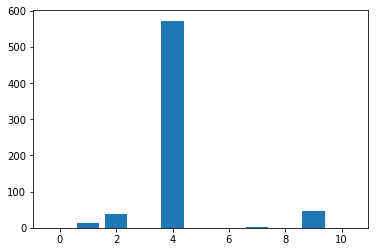

In [35]:
plt.close()
fig, bar = plt.subplots()
indx = range(11)
p = 50
features = [ww_f_tr[p][f]/np.average(ww_f_tr[:,f]) for f in range(11)]
bar.bar(indx, features)
plt.show()



Now we need to build the image data set to use in training the image recognizer. Note we will also at this point simplify our task a bit and reduce the numbr of categories. The image base recognizer uses a directory structure containing images to identify the classes, so as we build the image data set, we will put them into this data structure. This step will take some time. Go have a coffee. Recall again our histogram for white wine: [   0    0    0   20  163 1457 2198  880  175    5    0]. We will create a few categories for these.

In [20]:
# Create the directory structure, if it doesnt exist.
doing_retraining = False
if doing_retraining:
    # Build the nested directory strcture needed for the retraining approach.
    if not os.path.exists("wines"):
        os.makedirs("wines")
        os.makedirs("wines/undrinkable")
        os.makedirs("wines/poor")
        os.makedirs("wines/ok")
        os.makedirs("wines/good")
        os.makedirs("wines/excellent")
        
        f_inds = range(11)
        for p in range (len(ww_f_tr)):
            features = ww_f_tr[p]
            for f in f_inds:
                features[f] = features[f]/np.average(ww_f_tr[:,f])
                
            plt.close()
            _, bar = plt.subplots()
            bar.bar(f_inds, features)
            lab = ww_labels[p]
            if lab <= 4:
                plt.savefig("wines/undrinkable/WW%04d.jpeg"%(p))
            if lab == 5:
                plt.savefig("wines/poor/WW%04d.jpeg"%(p))
            if lab == 6:
                plt.savefig("wines/ok/WW%04d.jpeg"%(p))
            if lab == 7:
                plt.savefig("wines/good/WW%04d.jpeg"%(p))
            if lab >= 8:
                plt.savefig("wines/excellent/WW%04d.jpeg"%(p))
            
else:
    # In the case of replacing the final classifier with a KNN, a simpler structure is needed.
    if not os.path.exists("wines_t"):
        os.makedirs("wines_t")

        f_inds = range(11)
        for p in range (len(ww_f_tr)):
            features = ww_f_tr[p]
            for f in f_inds:
                features[f] = features[f]/np.average(ww_f_tr[:,f])
                
            plt.close()
            _, bar = plt.subplots()
            bar.bar(f_inds, features)
            plt.savefig("wines_t/WW%04d.jpeg"%(p))
    
    if not os.path.exists("wines_v"):
        os.makedirs("wines_v")

        f_inds = range(11)
        for p in range (len(ww_f_va)):
            features = ww_f_tr[p]
            for f in f_inds:
                features[f] = features[f]/np.average(ww_f_va[:,f])
                
            plt.close()
            _, bar = plt.subplots()
            bar.bar(f_inds, features)
            plt.savefig("wines_v/WW%04d.jpeg"%(p))


For the retraining approach, I have moved the wines directory to the Retain application and trialed the approach there. Validation accuracy was around 33% to 60%, but the test accuracy was only 33%.

As a simpler alternative to retraining the final layer of the neural net, we can simply remove it and replace it with a KNN classifier using the final pooling layer are the source for our features. This easily demonstrates the ability to adapt CNNs for use in transfer learning.

First make sure the Inception and TensorFlow environment is set up.

In [26]:
if not os.path.exists("model"):
    os.makedirs("model")
    
if not os.path.exists("model/inception-2015-12-05.tgz"):
    filepath, _ = urllib.request.urlretrieve(
            "http://download.tensorflow.org/models/image/imagenet/inception-2015-12-05.tgz", "model/inception-2015-12-05.tgz")
    tarfile.open(filepath, 'r:gz').extractall("model")
 

Now we need to run all our images through the Inception CNN and then set up a KNN to train against the lnown labels.

In [28]:
# Set up Inception CNN.
tf.reset_default_graph()
f = tf.gfile.FastGFile("model/classify_image_graph_def.pb", 'rb')
graph_def = tf.GraphDef()
graph_def.ParseFromString(f.read())
tf.import_graph_def(graph_def, name='')
sess = tf.Session()

if os.path.exists ("SavedFeatures/tr_f.npy"):

    tr_features = np.load("SavedFeatures/tr_f.npy")
    tr_labels = np.load("SavedFeatures/tr_l.npy")
    va_features = np.load("SavedFeatures/va_f.npy")
    va_labels = np.load("SavedFeatures/va_l.npy")

else:

    os.makedirs("SavedFeatures")
    
    pool3 = sess.graph.get_tensor_by_name('pool_3:0')

    tr_features = np.empty((len(ww_f_tr), 2048), dtype='float32')
    tr_labels = np.empty(len(ww_l_tr), dtype='int')
    for i in range(len(ww_f_tr)):
        image_f = "wines_t/WW%04d.jpeg" % (i)
        image = tf.gfile.FastGFile(image_f, 'rb').read()
        tr_features[i] = sess.run(pool3, {'DecodeJpeg/contents:0': image})[0][0][0]
        tr_labels[i] = ww_l_tr[i]
        if i % 100 == 0:
            print("Generating training feature set for image number = ", i)

    va_features = np.empty((len(ww_f_va), 2048), dtype='float32')
    va_labels = np.empty(len(ww_l_va), dtype='int')
    for i in range(len(ww_f_va)):
        image_f = "wines_v/WW%04d.jpeg" % (i)
        image = tf.gfile.FastGFile(image_f, 'rb').read()
        va_features[i] = sess.run(pool3, {'DecodeJpeg/contents:0': image})[0][0][0]
        va_labels[i] = ww_l_va[i]
        if i % 100 == 0:
            print("Generating validation feature set for image number = ", i)


    np.save("SavedFeatures/tr_f.npy", tr_features)
    np.save("SavedFeatures/tr_l.npy", tr_labels)
    np.save("SavedFeatures/va_f.npy", va_features)
    np.save("SavedFeatures/va_l.npy", va_labels)


Generating training feature set for image number =  0


Generating training feature set for image number =  10


Generating training feature set for image number =  20


Generating training feature set for image number =  30


Generating training feature set for image number =  40


Generating training feature set for image number =  50


Generating training feature set for image number =  60


Generating training feature set for image number =  70


Generating training feature set for image number =  80


Generating training feature set for image number =  90


Generating training feature set for image number =  100


Generating training feature set for image number =  110


Generating training feature set for image number =  120


Generating training feature set for image number =  130


Generating training feature set for image number =  140


Generating training feature set for image number =  150


Generating training feature set for image number =  160


Generating training feature set for image number =  170


Generating training feature set for image number =  180


Generating training feature set for image number =  190


Generating training feature set for image number =  200


Generating training feature set for image number =  210


Generating training feature set for image number =  220


Generating training feature set for image number =  230


Generating training feature set for image number =  240


Generating training feature set for image number =  250


Generating training feature set for image number =  260


Generating training feature set for image number =  270


Generating training feature set for image number =  280


Generating training feature set for image number =  290


Generating training feature set for image number =  300


Generating training feature set for image number =  310


Generating training feature set for image number =  320


Generating training feature set for image number =  330


Generating training feature set for image number =  340


Generating training feature set for image number =  350


Generating training feature set for image number =  360


Generating training feature set for image number =  370


Generating training feature set for image number =  380


Generating training feature set for image number =  390


Generating training feature set for image number =  400


Generating training feature set for image number =  410


Generating training feature set for image number =  420


Generating training feature set for image number =  430


Generating training feature set for image number =  440


Generating training feature set for image number =  450


Generating training feature set for image number =  460


Generating training feature set for image number =  470


Generating training feature set for image number =  480


Generating training feature set for image number =  490


Generating training feature set for image number =  500


Generating training feature set for image number =  510


Generating training feature set for image number =  520


Generating training feature set for image number =  530


Generating training feature set for image number =  540


Generating training feature set for image number =  550


Generating training feature set for image number =  560


Generating training feature set for image number =  570


Generating training feature set for image number =  580


Generating training feature set for image number =  590


Generating training feature set for image number =  600


Generating training feature set for image number =  610


Generating training feature set for image number =  620


Generating training feature set for image number =  630


Generating training feature set for image number =  640


Generating training feature set for image number =  650


Generating training feature set for image number =  660


Generating training feature set for image number =  670


Generating training feature set for image number =  680


Generating training feature set for image number =  690


Generating training feature set for image number =  700


Generating training feature set for image number =  710


Generating training feature set for image number =  720


Generating training feature set for image number =  730


Generating training feature set for image number =  740


Generating training feature set for image number =  750


Generating training feature set for image number =  760


Generating training feature set for image number =  770


Generating training feature set for image number =  780


Generating training feature set for image number =  790


Generating training feature set for image number =  800


Generating training feature set for image number =  810


Generating training feature set for image number =  820


Generating training feature set for image number =  830


Generating training feature set for image number =  840


Generating training feature set for image number =  850


Generating training feature set for image number =  860


Generating training feature set for image number =  870


Generating training feature set for image number =  880


Generating training feature set for image number =  890


Generating training feature set for image number =  900


Generating training feature set for image number =  910


Generating training feature set for image number =  920


Generating training feature set for image number =  930


Generating training feature set for image number =  940


Generating training feature set for image number =  950


Generating training feature set for image number =  960


Generating training feature set for image number =  970


Generating training feature set for image number =  980


Generating training feature set for image number =  990


Generating training feature set for image number =  1000


Generating training feature set for image number =  1010


Generating training feature set for image number =  1020


Generating training feature set for image number =  1030


Generating training feature set for image number =  1040


Generating training feature set for image number =  1050


Generating training feature set for image number =  1060


Generating training feature set for image number =  1070


Generating training feature set for image number =  1080


Generating training feature set for image number =  1090


Generating training feature set for image number =  1100


Generating training feature set for image number =  1110


Generating training feature set for image number =  1120


Generating training feature set for image number =  1130


Generating training feature set for image number =  1140


Generating training feature set for image number =  1150


Generating training feature set for image number =  1160


Generating training feature set for image number =  1170


Generating training feature set for image number =  1180


Generating training feature set for image number =  1190


Generating training feature set for image number =  1200


Generating training feature set for image number =  1210


Generating training feature set for image number =  1220


Generating training feature set for image number =  1230


Generating training feature set for image number =  1240


Generating training feature set for image number =  1250


Generating training feature set for image number =  1260


Generating training feature set for image number =  1270


Generating training feature set for image number =  1280


Generating training feature set for image number =  1290


Generating training feature set for image number =  1300


Generating training feature set for image number =  1310


Generating training feature set for image number =  1320


Generating training feature set for image number =  1330


Generating training feature set for image number =  1340


Generating training feature set for image number =  1350


Generating training feature set for image number =  1360


Generating training feature set for image number =  1370


Generating training feature set for image number =  1380


Generating training feature set for image number =  1390


Generating training feature set for image number =  1400


Generating training feature set for image number =  1410


Generating training feature set for image number =  1420


Generating training feature set for image number =  1430


Generating training feature set for image number =  1440


Generating training feature set for image number =  1450


Generating training feature set for image number =  1460


Generating training feature set for image number =  1470


Generating training feature set for image number =  1480


Generating training feature set for image number =  1490


Generating training feature set for image number =  1500


Generating training feature set for image number =  1510


Generating training feature set for image number =  1520


Generating training feature set for image number =  1530


Generating training feature set for image number =  1540


Generating training feature set for image number =  1550


Generating training feature set for image number =  1560


Generating training feature set for image number =  1570


Generating training feature set for image number =  1580


Generating training feature set for image number =  1590


Generating training feature set for image number =  1600


Generating training feature set for image number =  1610


Generating training feature set for image number =  1620


Generating training feature set for image number =  1630


Generating training feature set for image number =  1640


Generating training feature set for image number =  1650


Generating training feature set for image number =  1660


Generating training feature set for image number =  1670


Generating training feature set for image number =  1680


Generating training feature set for image number =  1690


Generating training feature set for image number =  1700


Generating training feature set for image number =  1710


Generating training feature set for image number =  1720


Generating training feature set for image number =  1730


Generating training feature set for image number =  1740


Generating training feature set for image number =  1750


Generating training feature set for image number =  1760


Generating training feature set for image number =  1770


Generating training feature set for image number =  1780


Generating training feature set for image number =  1790


Generating training feature set for image number =  1800


Generating training feature set for image number =  1810


Generating training feature set for image number =  1820


Generating training feature set for image number =  1830


Generating training feature set for image number =  1840


Generating training feature set for image number =  1850


Generating training feature set for image number =  1860


Generating training feature set for image number =  1870


Generating training feature set for image number =  1880


Generating training feature set for image number =  1890


Generating training feature set for image number =  1900


Generating training feature set for image number =  1910


Generating training feature set for image number =  1920


Generating training feature set for image number =  1930


Generating training feature set for image number =  1940


Generating training feature set for image number =  1950


Generating training feature set for image number =  1960


Generating training feature set for image number =  1970


Generating training feature set for image number =  1980


Generating training feature set for image number =  1990


Generating training feature set for image number =  2000


Generating training feature set for image number =  2010


Generating training feature set for image number =  2020


Generating training feature set for image number =  2030


Generating training feature set for image number =  2040


Generating training feature set for image number =  2050


Generating training feature set for image number =  2060


Generating training feature set for image number =  2070


Generating training feature set for image number =  2080


Generating training feature set for image number =  2090


Generating training feature set for image number =  2100


Generating training feature set for image number =  2110


Generating training feature set for image number =  2120


Generating training feature set for image number =  2130


Generating training feature set for image number =  2140


Generating training feature set for image number =  2150


Generating training feature set for image number =  2160


Generating training feature set for image number =  2170


Generating training feature set for image number =  2180


Generating training feature set for image number =  2190


Generating training feature set for image number =  2200


Generating training feature set for image number =  2210


Generating training feature set for image number =  2220


Generating training feature set for image number =  2230


Generating training feature set for image number =  2240


Generating training feature set for image number =  2250


Generating training feature set for image number =  2260


Generating training feature set for image number =  2270


Generating training feature set for image number =  2280


Generating training feature set for image number =  2290


Generating training feature set for image number =  2300


Generating training feature set for image number =  2310


Generating training feature set for image number =  2320


Generating training feature set for image number =  2330


Generating training feature set for image number =  2340


Generating training feature set for image number =  2350


Generating training feature set for image number =  2360


Generating training feature set for image number =  2370


Generating training feature set for image number =  2380


Generating training feature set for image number =  2390


Generating training feature set for image number =  2400


Generating training feature set for image number =  2410


Generating training feature set for image number =  2420


Generating training feature set for image number =  2430


Generating training feature set for image number =  2440


Generating training feature set for image number =  2450


Generating training feature set for image number =  2460


Generating training feature set for image number =  2470


Generating training feature set for image number =  2480


Generating training feature set for image number =  2490


Generating training feature set for image number =  2500


Generating training feature set for image number =  2510


Generating training feature set for image number =  2520


Generating training feature set for image number =  2530


Generating training feature set for image number =  2540


Generating training feature set for image number =  2550


Generating training feature set for image number =  2560


Generating training feature set for image number =  2570


Generating training feature set for image number =  2580


Generating training feature set for image number =  2590


Generating training feature set for image number =  2600


Generating training feature set for image number =  2610


Generating training feature set for image number =  2620


Generating training feature set for image number =  2630


Generating training feature set for image number =  2640


Generating training feature set for image number =  2650


Generating training feature set for image number =  2660


Generating training feature set for image number =  2670


Generating training feature set for image number =  2680


Generating training feature set for image number =  2690


Generating training feature set for image number =  2700


Generating training feature set for image number =  2710


Generating training feature set for image number =  2720


Generating training feature set for image number =  2730


Generating training feature set for image number =  2740


Generating training feature set for image number =  2750


Generating training feature set for image number =  2760


Generating training feature set for image number =  2770


Generating training feature set for image number =  2780


Generating training feature set for image number =  2790


Generating training feature set for image number =  2800


Generating training feature set for image number =  2810


Generating training feature set for image number =  2820


Generating training feature set for image number =  2830


Generating training feature set for image number =  2840


Generating training feature set for image number =  2850


Generating training feature set for image number =  2860


Generating training feature set for image number =  2870


Generating training feature set for image number =  2880


Generating training feature set for image number =  2890


Generating training feature set for image number =  2900


Generating training feature set for image number =  2910


Generating training feature set for image number =  2920


Generating training feature set for image number =  2930


Generating training feature set for image number =  2940


Generating training feature set for image number =  2950


Generating training feature set for image number =  2960


Generating training feature set for image number =  2970


Generating training feature set for image number =  2980


Generating training feature set for image number =  2990


Generating training feature set for image number =  3000


Generating training feature set for image number =  3010


Generating training feature set for image number =  3020


Generating training feature set for image number =  3030


Generating training feature set for image number =  3040


Generating training feature set for image number =  3050


Generating training feature set for image number =  3060


Generating training feature set for image number =  3070


Generating training feature set for image number =  3080


Generating training feature set for image number =  3090


Generating training feature set for image number =  3100


Generating training feature set for image number =  3110


Generating training feature set for image number =  3120


Generating training feature set for image number =  3130


Generating training feature set for image number =  3140


Generating training feature set for image number =  3150


Generating training feature set for image number =  3160


Generating training feature set for image number =  3170


Generating training feature set for image number =  3180


Generating training feature set for image number =  3190


Generating training feature set for image number =  3200


Generating training feature set for image number =  3210


Generating training feature set for image number =  3220


Generating training feature set for image number =  3230


Generating training feature set for image number =  3240


Generating training feature set for image number =  3250


Generating training feature set for image number =  3260


Generating training feature set for image number =  3270


Generating training feature set for image number =  3280


Generating training feature set for image number =  3290


Generating training feature set for image number =  3300


Generating training feature set for image number =  3310


Generating training feature set for image number =  3320


Generating training feature set for image number =  3330


Generating training feature set for image number =  3340


Generating training feature set for image number =  3350


Generating training feature set for image number =  3360


Generating training feature set for image number =  3370


Generating training feature set for image number =  3380


Generating training feature set for image number =  3390


Generating training feature set for image number =  3400


Generating training feature set for image number =  3410


Generating training feature set for image number =  3420


Generating training feature set for image number =  3430


Generating training feature set for image number =  3440


Generating training feature set for image number =  3450


Generating training feature set for image number =  3460


Generating training feature set for image number =  3470


Generating training feature set for image number =  3480


Generating training feature set for image number =  3490


Generating training feature set for image number =  3500


Generating training feature set for image number =  3510


Generating training feature set for image number =  3520


Generating training feature set for image number =  3530


Generating training feature set for image number =  3540


Generating training feature set for image number =  3550


Generating training feature set for image number =  3560


Generating training feature set for image number =  3570


Generating training feature set for image number =  3580


Generating training feature set for image number =  3590


Generating training feature set for image number =  3600


Generating training feature set for image number =  3610


Generating training feature set for image number =  3620


Generating training feature set for image number =  3630


Generating training feature set for image number =  3640


Generating training feature set for image number =  3650


Generating training feature set for image number =  3660


Generating training feature set for image number =  3670


Generating training feature set for image number =  3680


Generating training feature set for image number =  3690


Generating training feature set for image number =  3700


Generating training feature set for image number =  3710


Generating training feature set for image number =  3720


Generating training feature set for image number =  3730


Generating training feature set for image number =  3740


Generating training feature set for image number =  3750


Generating training feature set for image number =  3760


Generating training feature set for image number =  3770


Generating training feature set for image number =  3780


Generating training feature set for image number =  3790


Generating training feature set for image number =  3800


Generating training feature set for image number =  3810


Generating training feature set for image number =  3820


Generating training feature set for image number =  3830


Generating training feature set for image number =  3840


Generating training feature set for image number =  3850


Generating training feature set for image number =  3860


Generating training feature set for image number =  3870


Generating training feature set for image number =  3880


Generating training feature set for image number =  3890


Generating training feature set for image number =  3900


Generating training feature set for image number =  3910


Generating validation feature set for image number =  0


Generating validation feature set for image number =  10


Generating validation feature set for image number =  20


Generating validation feature set for image number =  30


Generating validation feature set for image number =  40


Generating validation feature set for image number =  50


Generating validation feature set for image number =  60


Generating validation feature set for image number =  70


Generating validation feature set for image number =  80


Generating validation feature set for image number =  90


Generating validation feature set for image number =  100


Generating validation feature set for image number =  110


Generating validation feature set for image number =  120


Generating validation feature set for image number =  130


Generating validation feature set for image number =  140


Generating validation feature set for image number =  150


Generating validation feature set for image number =  160


Generating validation feature set for image number =  170


Generating validation feature set for image number =  180


Generating validation feature set for image number =  190


Generating validation feature set for image number =  200


Generating validation feature set for image number =  210


Generating validation feature set for image number =  220


Generating validation feature set for image number =  230


Generating validation feature set for image number =  240


Generating validation feature set for image number =  250


Generating validation feature set for image number =  260


Generating validation feature set for image number =  270


Generating validation feature set for image number =  280


Generating validation feature set for image number =  290


Generating validation feature set for image number =  300


Generating validation feature set for image number =  310


Generating validation feature set for image number =  320


Generating validation feature set for image number =  330


Generating validation feature set for image number =  340


Generating validation feature set for image number =  350


Generating validation feature set for image number =  360


Generating validation feature set for image number =  370


Generating validation feature set for image number =  380


Generating validation feature set for image number =  390


Generating validation feature set for image number =  400


Generating validation feature set for image number =  410


Generating validation feature set for image number =  420


Generating validation feature set for image number =  430


Generating validation feature set for image number =  440


Generating validation feature set for image number =  450


Generating validation feature set for image number =  460


Generating validation feature set for image number =  470


Generating validation feature set for image number =  480


Now train and assess our KNN based on the features extracted from the images.

In [29]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(tr_features, tr_labels)

# Look at 10 of our validation set:
for i in range(10):
    pred = knn.predict([va_features[i]])[0]
    probs = knn.predict_proba([va_features[i]])
    print ("Prediction = ", pred, "Actual = ", va_labels[i], " Probabilities = ", probs[0])
    
# Run the complete validation data set.
score = knn.score(va_features, va_labels)
print("Score = ", score)


Prediction =  5 Actual =  6  Probabilities =  [ 0.19024415  0.          0.42606823  0.38368762  0.          0.          0.        ]
Prediction =  5 Actual =  7  Probabilities =  [ 0.  0.  1.  0.  0.  0.  0.]
Prediction =  6 Actual =  5  Probabilities =  [ 0.          0.          0.16458882  0.83541118  0.          0.          0.        ]
Prediction =  5 Actual =  6  Probabilities =  [ 0.  0.  1.  0.  0.  0.  0.]
Prediction =  5 Actual =  7  Probabilities =  [ 0.          0.          0.63259922  0.36740078  0.          0.          0.        ]


Prediction =  5 Actual =  6  Probabilities =  [ 0.          0.          0.52728993  0.31720286  0.1555072   0.          0.        ]
Prediction =  5 Actual =  7  Probabilities =  [ 0.          0.          0.36790688  0.34547989  0.28661323  0.          0.        ]
Prediction =  6 Actual =  6  Probabilities =  [ 0.          0.          0.          0.67658449  0.32341551  0.          0.        ]
Prediction =  7 Actual =  6  Probabilities =  [ 0.          0.          0.16858536  0.          0.52601957  0.30539508
  0.        ]
Prediction =  5 Actual =  6  Probabilities =  [ 0.          0.24797258  0.56863781  0.18338961  0.          0.          0.        ]


Score =  0.38036809816


In [30]:
fp = np.zeros(11)
fn = np.zeros(11)
n = len(va_labels)
tot = 0
print("N = ", n)
for i in range(n):
    pred = knn.predict([va_features[i]])[0]
    if pred != va_labels[i]:
        tot = tot + 1
        fn[int(va_labels[i])] = fn[int(va_labels[i])] + 1
        fp[int(pred)] = fp[int(pred)] + 1

print("Total wrong = %3d. Eror rate = %8.4f%%" % (tot, 100.0*tot/n))
for i in range(11):
    print("Class = %2d False positive = %3d (%5.1f%%) False negative = %3d (%5.1f%%)." % (i, fp[i], 100.0*fp[i]/n, fn[i
    ], 100.0*fn[i]/n))

        

N =  489


Total wrong = 303. Eror rate =  61.9632%
Class =  0 False positive =   0 (  0.0%) False negative =   0 (  0.0%).
Class =  1 False positive =   0 (  0.0%) False negative =   0 (  0.0%).
Class =  2 False positive =   0 (  0.0%) False negative =   0 (  0.0%).
Class =  3 False positive =   0 (  0.0%) False negative =   3 (  0.6%).
Class =  4 False positive =   3 (  0.6%) False negative =  17 (  3.5%).
Class =  5 False positive = 102 ( 20.9%) False negative = 100 ( 20.4%).
Class =  6 False positive = 137 ( 28.0%) False negative =  91 ( 18.6%).
Class =  7 False positive =  56 ( 11.5%) False negative =  74 ( 15.1%).
Class =  8 False positive =   5 (  1.0%) False negative =  18 (  3.7%).
Class =  9 False positive =   0 (  0.0%) False negative =   0 (  0.0%).
Class = 10 False positive =   0 (  0.0%) False negative =   0 (  0.0%).


It is clear that implementing KNN diectly from these numerical features is a better approach than imagification. This will not allways be the case, partictularly for noisy data sets.

Let's try being smarter about the data:
 
Input variables (based on physicochemical tests):
  1 - fixed acidity
  2 - volatile acidity
  3 - citric acid
  4 - residual sugar
  5 - chlorides
  6 - free sulfur dioxide
  7 - total sulfur dioxide
  8 - density
  9 - pH
  10 - sulphates
  11 - alcohol

Output variable (based on sensory data): 
  12 - quality (score between 0 and 10)
